In [59]:
import pandas as pd
from sklearn import feature_extraction
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [60]:
RANDOM_SEED = 42

In [61]:
df_train = pd.read_csv('../data/processed/cleaned_train.csv')
df_result = pd.read_csv('../data/processed/cleaned_test.csv')

df_train.shape, df_result.shape

((7613, 3), (3263, 2))

In [62]:
count_vactorizer = feature_extraction.text.CountVectorizer()

In [63]:
train_vectors = count_vactorizer.fit_transform(df_train.text)
result_vectors = count_vactorizer.transform(df_result.text)

In [64]:
train_vectors.shape, result_vectors.shape

((7613, 14820), (3263, 14820))

In [65]:
X_train, X_test, y_train, y_test = train_test_split(train_vectors, df_train.target, test_size=0.2, random_state=RANDOM_SEED)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6090, 14820), (1523, 14820), (6090,), (1523,))

In [66]:
model = LogisticRegression(
    penalty='l2',
    max_iter=500,
    solver='saga',
    random_state=RANDOM_SEED
)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_true=y_train, y_pred=y_train_pred)
test_acc = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print(f'Train Acc: {train_acc*100:.2f}% | Test Acc: {test_acc*100:.2f}%')

Train Acc: 95.91% | Test Acc: 80.83%


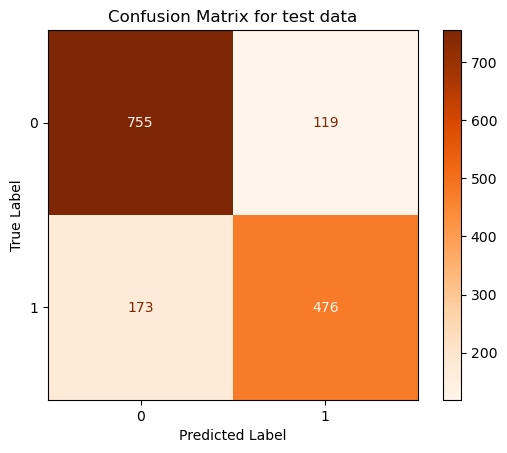

In [67]:
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

display.plot(cmap=plt.cm.Oranges)

plt.title('Confusion Matrix for test data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [68]:
y_result_labels = model.predict(result_vectors)

In [69]:
from collections import Counter

Counter(y_result_labels)

Counter({np.int64(0): 2041, np.int64(1): 1222})

In [70]:
df_result['target'] = y_result_labels

In [71]:
df_result[['id', 'target']].to_csv('../data/processed/submission_4.csv', index=False)